In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np


In [2]:
# Cargar el grafo del club de karate
G = nx.karate_club_graph()

In [3]:
# Información básica del grafo
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")
print(f"Grados de los nodos: {dict(G.degree())}")

Número de nodos: 34
Número de aristas: 78
Grados de los nodos: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


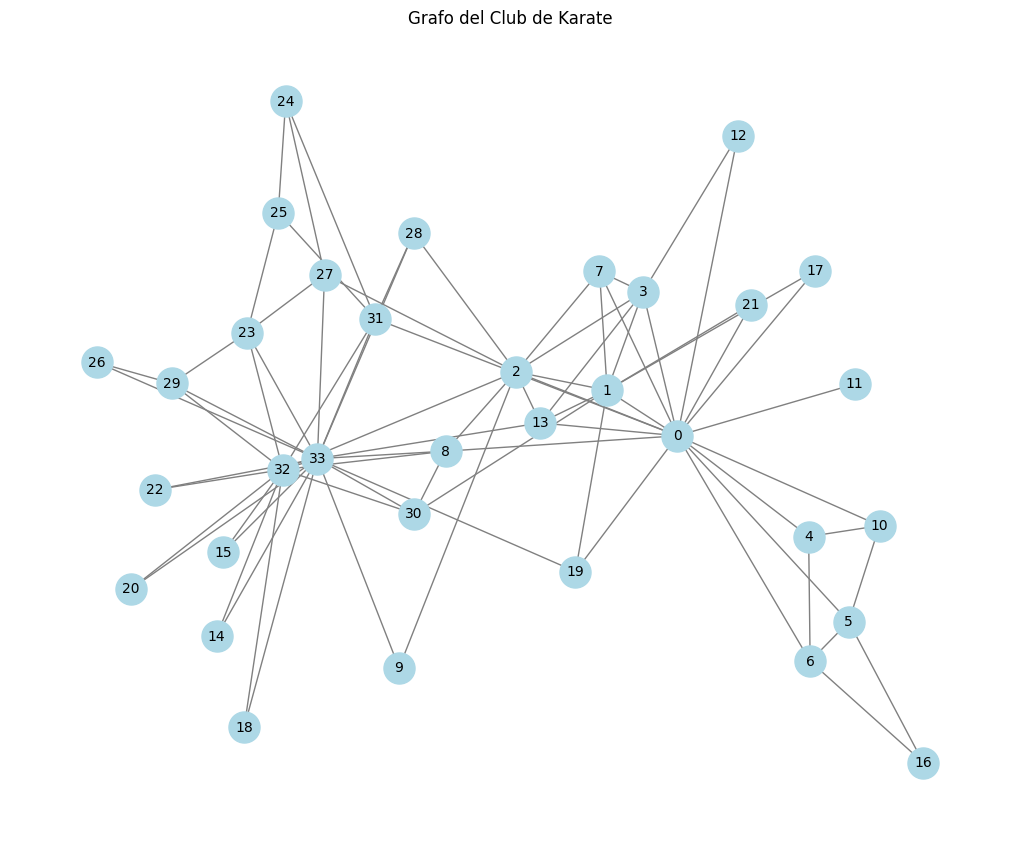

In [4]:
# Visualizar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Usamos Fruchterman-Reingold para la disposición
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Grafo del Club de Karate")
plt.show()


In [5]:
# Detección de comunidades (usando el algoritmo de Girvan-Newman)
from networkx.algorithms.community import girvan_newman

In [6]:
# Aplicar el algoritmo
communities = girvan_newman(G)
top_level_communities = next(communities)  # Obtener la primera división

In [7]:
# Colorear los nodos según su comunidad
community_map = {}
for idx, community in enumerate(top_level_communities):
    for node in community:
        community_map[node] = idx

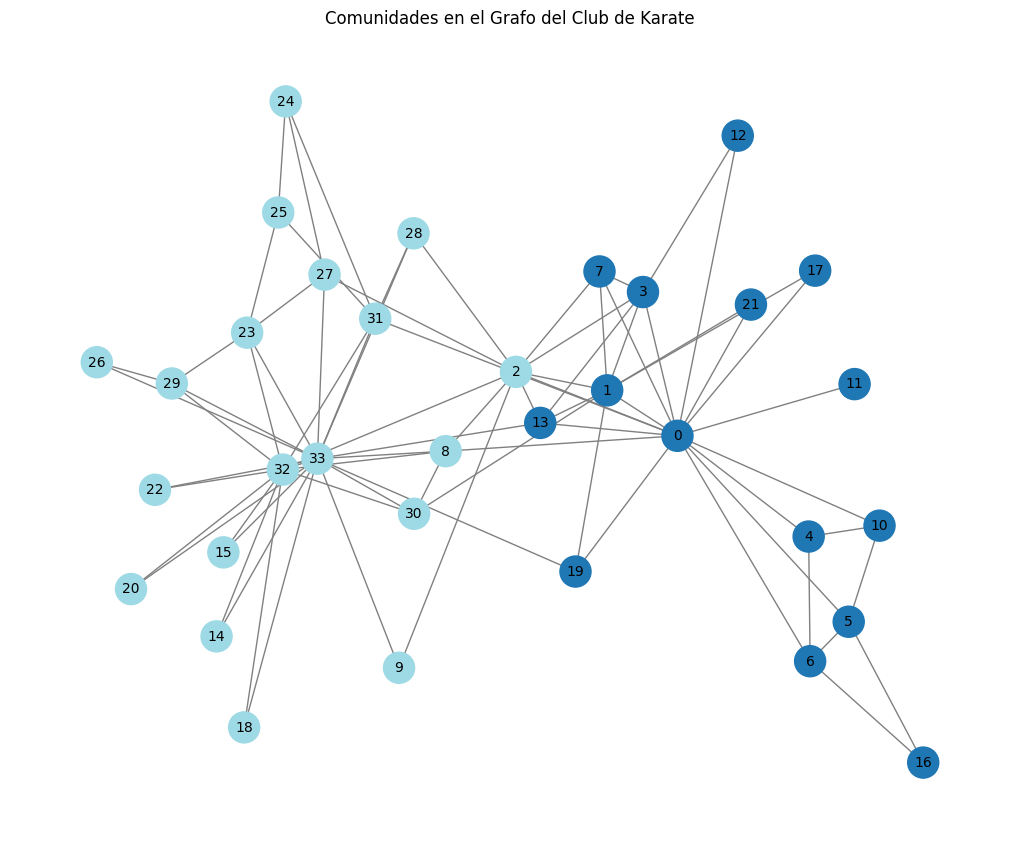

In [8]:
# Visualizar con colores de comunidad
node_colors = [community_map[node] for node in G.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab20, edge_color='gray', node_size=500, font_size=10)
plt.title("Comunidades en el Grafo del Club de Karate")
plt.show()

Comunidades detectadas:
Comunidad 1: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
Comunidad 2: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


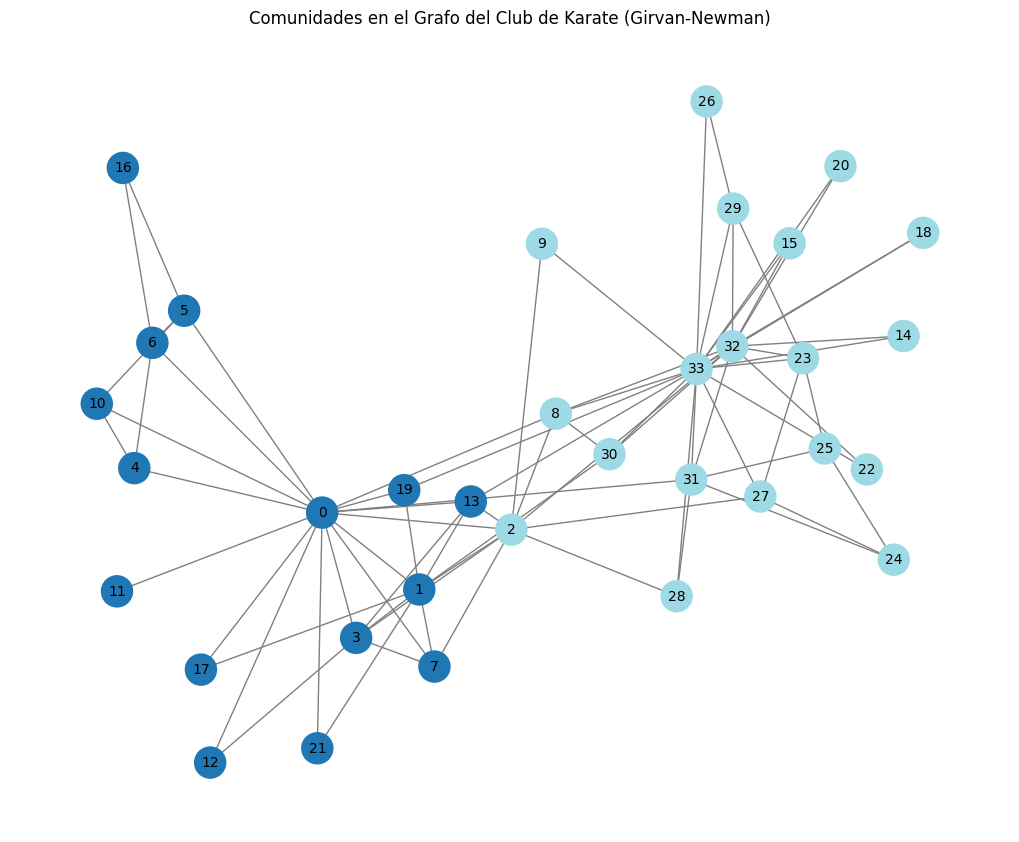

In [29]:
# Cargar el grafo del club de karate
G = nx.karate_club_graph()

# Aplicar el algoritmo de Girvan-Newman
communities = girvan_newman(G)

# Obtener la primera división (dos comunidades principales)
top_level_communities = next(communities)

# Mostrar las comunidades
print("Comunidades detectadas:")
for idx, community in enumerate(top_level_communities):
    print(f"Comunidad {idx + 1}: {community}")

# Colorear los nodos según su comunidad
community_map = {}
for idx, community in enumerate(top_level_communities):
    for node in community:
        community_map[node] = idx

node_colors = [community_map[node] for node in G.nodes()]

# Visualizar el grafo con las comunidades
pos = nx.spring_layout(G)  # Disposición basada en fuerzas
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab20, edge_color='gray', node_size=500, font_size=10)
plt.title("Comunidades en el Grafo del Club de Karate (Girvan-Newman)")
plt.show()

Aristas con mayor betweenness:
Arista (0, 31): betweenness = 0.1273
Arista (0, 6): betweenness = 0.0781
Arista (0, 5): betweenness = 0.0781
Arista (0, 2): betweenness = 0.0778
Arista (0, 8): betweenness = 0.0742


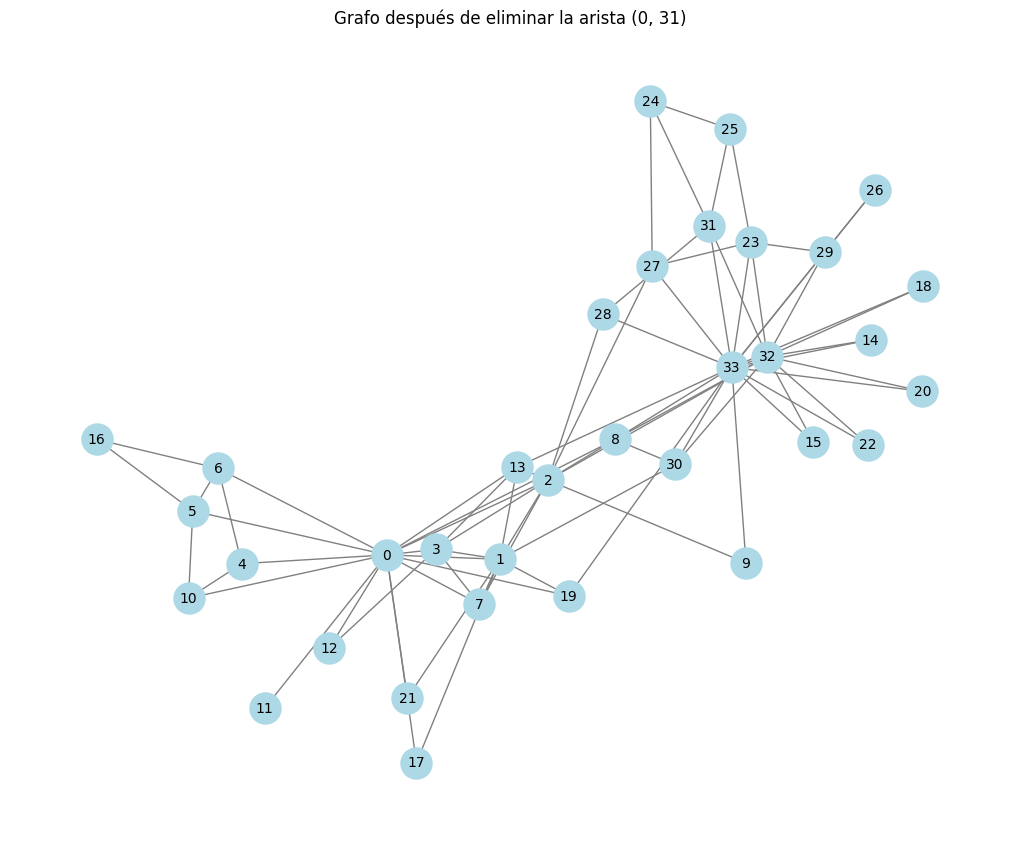

In [30]:
# Calcular el betweenness de las aristas
edge_betweenness = nx.edge_betweenness_centrality(G)

# Mostrar las aristas con el betweenness más alto
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
print("Aristas con mayor betweenness:")
for edge, betweenness in sorted_edges[:5]:  # Mostrar las 5 aristas con mayor betweenness
    print(f"Arista {edge}: betweenness = {betweenness:.4f}")

# Eliminar la arista con el mayor betweenness
edge_to_remove = sorted_edges[0][0]  # La arista con el betweenness más alto
G.remove_edge(*edge_to_remove)

# Visualizar el grafo después de eliminar la arista
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title(f"Grafo después de eliminar la arista {edge_to_remove}")
plt.show()

**Diferentes formas de visualización de la comunidad**

In [14]:
# Función para visualizar el grafo con diferentes algoritmos
def plot_graph(G, layout, title, **kwargs): # Add **kwargs to accept additional arguments
    pos = layout(G, **kwargs)  # Pass additional arguments to the layout function
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()

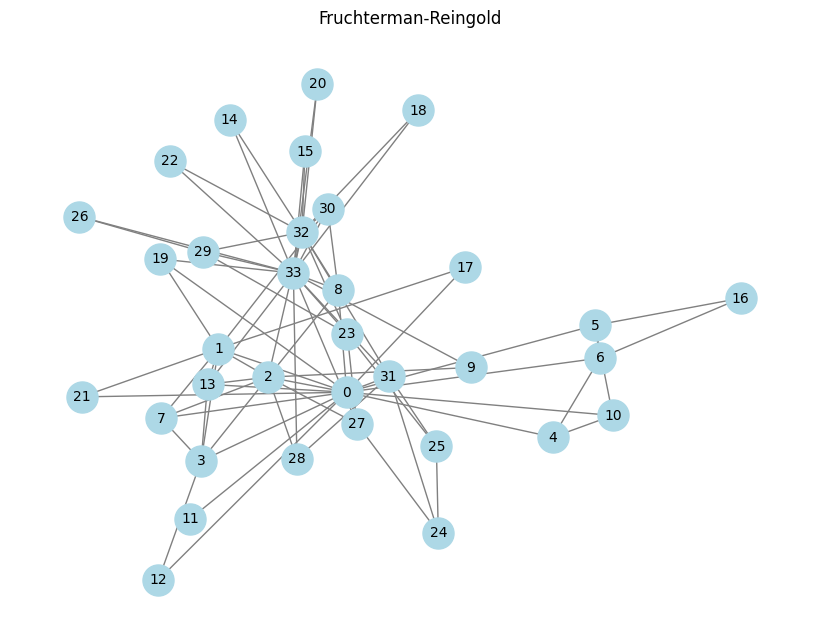

In [15]:
# Fruchterman-Reingold
plot_graph(G, nx.spring_layout, "Fruchterman-Reingold")


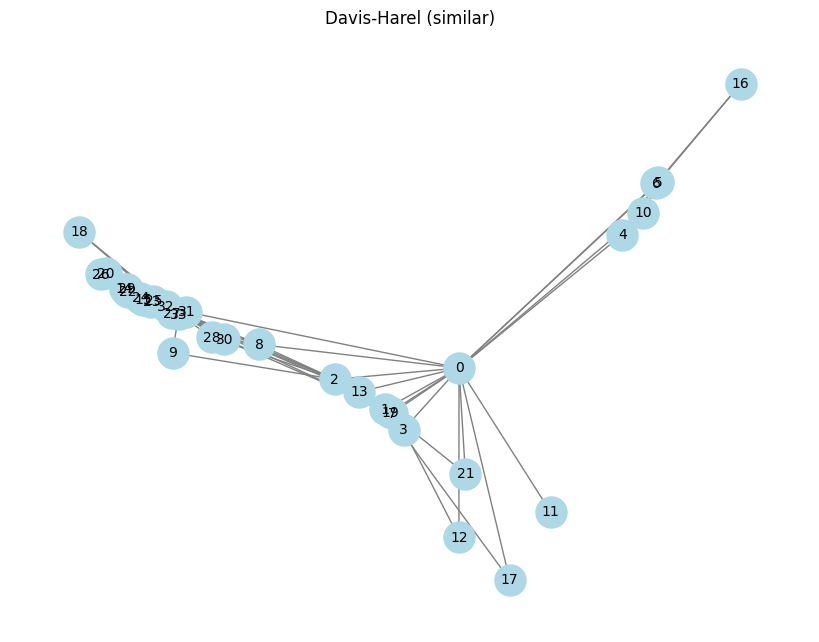

In [16]:
# Davis-Harel (no está implementado directamente en networkx, usamos otro similar)
plot_graph(G, nx.spectral_layout, "Davis-Harel (similar)")

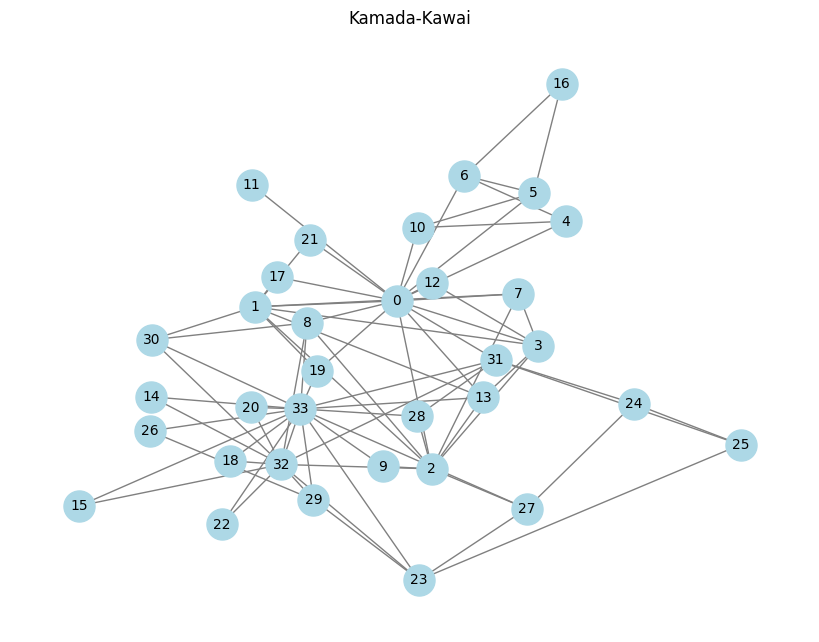

In [22]:
# Kamada-Kawai
pos_kamada_kawai = nx.kamada_kawai_layout(G)
# plot_graph expects a layout function, not positions.
# Pass the pre-calculated positions directly to nx.draw
plt.figure(figsize=(8, 6))
nx.draw(G, pos_kamada_kawai, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Kamada-Kawai")
plt.show()

In [25]:
# MDS (Multidimensional Scaling)
# Calculamos la matriz de distancias (longitud del camino más corto entre nodos)
shortest_path_lengths = dict(nx.shortest_path_length(G))
distance_matrix = np.array([[shortest_path_lengths[u][v] for v in G.nodes()] for u in G.nodes()])


In [26]:
# Aplicamos MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pos_mds = mds.fit_transform(distance_matrix)

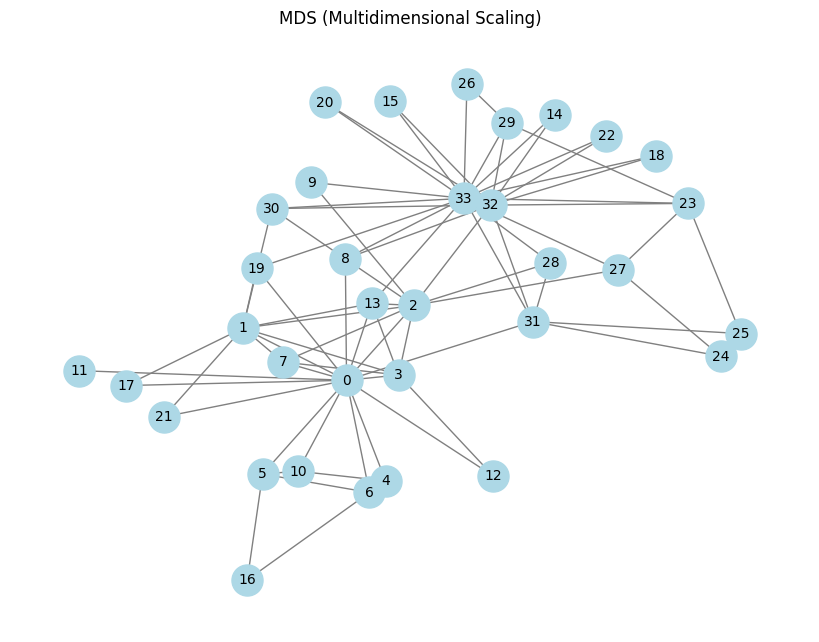

In [28]:
# Convertimos a un diccionario de posiciones
pos_mds = {node: pos_mds[i] for i, node in enumerate(G.nodes())}
# plot_graph expects a layout function, but pos_mds is a dictionary of positions.
# We need to pass pos_mds directly to nx.draw instead.
plt.figure(figsize=(8, 6))
nx.draw(G, pos_mds, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("MDS (Multidimensional Scaling)")
plt.show()

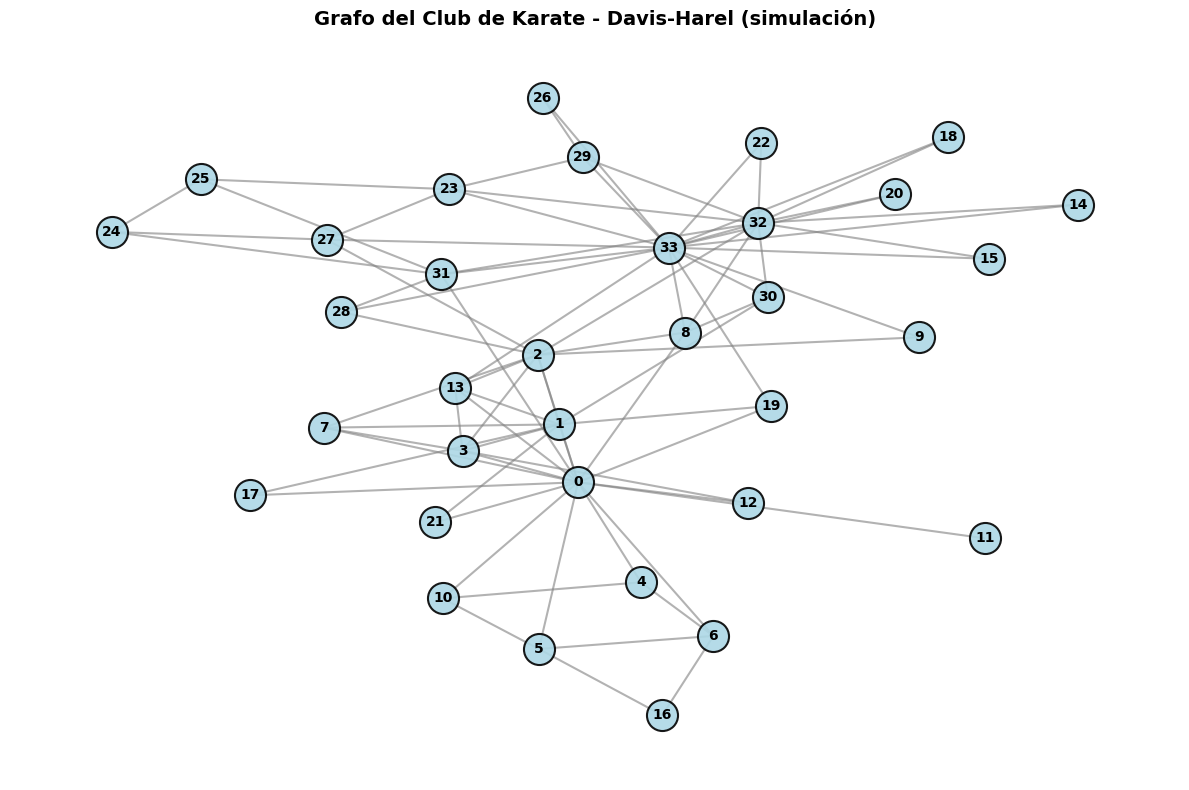

In [31]:
import networkx as nx
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Crear un grafo de ejemplo (grafo del club de karate)
G = nx.karate_club_graph()
n = G.number_of_nodes()

# Función de energía personalizada
def energy(pos):
    pos = pos.reshape(-1, 2)  # Convertir a matriz de posiciones (x, y)
    energy_value = 0.0

    # Repulsión entre nodos (para evitar superposiciones)
    for i in range(n):
        for j in range(i + 1, n):
            distance = np.linalg.norm(pos[i] - pos[j])
            if distance < 0.1:  # Evitar divisiones por cero
                distance = 0.1
            energy_value += 1 / distance  # A mayor cercanía, mayor repulsión

    # Atracción entre nodos conectados (para mantener aristas cortas)
    for u, v in G.edges():
        distance = np.linalg.norm(pos[u] - pos[v])
        energy_value += distance**2  # A mayor distancia, mayor penalización

    return energy_value

# Inicialización aleatoria de las posiciones
np.random.seed(42)  # Para reproducibilidad
initial_pos = np.random.rand(n * 2) * 10  # Posiciones aleatorias en un rango de 0 a 10

# Optimización de la función de energía
result = minimize(energy, initial_pos, method='BFGS')  # Método de optimización
pos = result.x.reshape(-1, 2)  # Convertir a matriz de posiciones (x, y)

# Dibujar el grafo con mejoras visuales
plt.figure(figsize=(12, 8))

# Nodos
nx.draw_networkx_nodes(
    G, pos,
    node_size=500,
    node_color='lightblue',
    edgecolors='black',  # Borde de los nodos
    linewidths=1.5,      # Grosor del borde
    alpha=0.9            # Transparencia
)

# Aristas
nx.draw_networkx_edges(
    G, pos,
    width=1.5,
    edge_color='gray',
    alpha=0.6            # Transparencia
)

# Etiquetas de los nodos
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_color='black',
    font_weight='bold'
)

# Título y ajustes visuales
plt.title("Grafo del Club de Karate - Davis-Harel (simulación)", fontsize=14, fontweight='bold')
plt.axis('off')  # Ocultar ejes
plt.tight_layout()  # Ajustar layout
plt.show()

Función de energía personalizada:

La energía aumenta si los nodos están muy cerca (repulsión) o si las aristas son muy largas (atracción).

Esto asegura que los nodos no se superpongan y que las aristas tengan una longitud adecuada.

Optimización:

Usamos scipy.optimize.minimize para encontrar las posiciones de los nodos que minimizan la energía.

El método BFGS es un algoritmo de optimización eficiente para problemas no lineales.

Mejoras visuales:

Nodos: Se dibujan con un borde negro y un color azul claro para que destaquen.

Aristas: Se dibujan con transparencia para evitar que el grafo se vea saturado.

Etiquetas: Se muestran en negrita para que sean fáciles de leer.

Título: Se agrega un título descriptivo y se ajusta el tamaño de la fuente.

In [39]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 21 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [40]:
# Cargar el grafo del Club de Karate
G = nx.karate_club_graph()

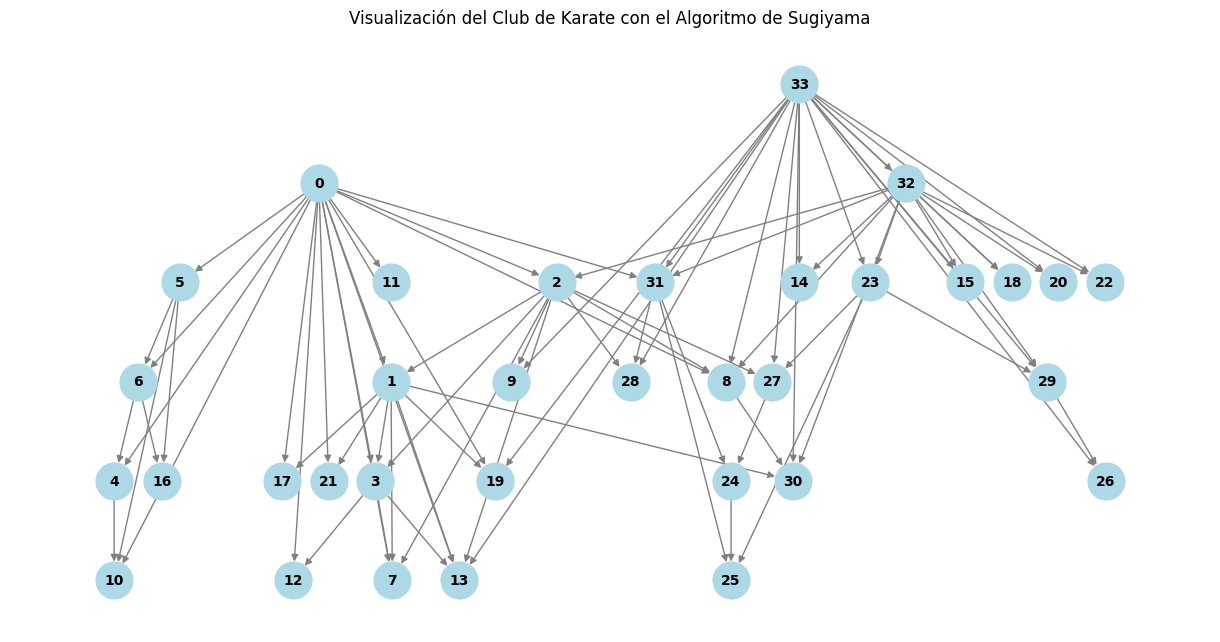

In [41]:
# Convertir a un grafo dirigido basado en centralidad de grado (opcional)
D = nx.DiGraph()
degree_centrality = nx.degree_centrality(G)

for u, v in G.edges():
    if degree_centrality[u] >= degree_centrality[v]:
        D.add_edge(u, v)  # Dirigir de nodo con mayor centralidad a menor
    else:
        D.add_edge(v, u)

# Import the necessary library
import pygraphviz

# Aplicar el algoritmo de Sugiyama usando Graphviz (dot)
pos = nx.nx_agraph.graphviz_layout(D, prog="dot")

# Dibujar el grafo
plt.figure(figsize=(12, 6))
nx.draw(D, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True)
plt.title("Visualización del Club de Karate con el Algoritmo de Sugiyama")
plt.show()